## Project: Student Performance Prediction (Linear Regression)
**Author:** Fawaz  
**Date:** January 2026  
### Aim
To build a **Linear Regression model** that predicts a student's `final_exam_score` based on their study habits, attendance, and previous academic performance. This analysis aims to identify the strongest predictors of academic success.
### Dataset Columns
* `hours_studied`: Number of hours studied per week.
* `attendance_percentage`: Percentage of classes attended.
* `previous_test_score`: Score on the previous test (0-100).
* `sleep_hours`: Average daily sleep.
* **Target:** `final_exam_score` (0-100).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

### Data Loading & Inspection

In [27]:
df = pd.read_csv("student_performance.csv")
df.head(10)

,hours_studied,attendance_percentage,previous_test_score,sleep_hours,final_exam_score
0,7,61,67,5,74.0
1,4,88,69,5,87.0
2,8,51,68,8,89.0
3,5,52,85,7,83.0
4,7,98,45,5,83.0
5,3,86,74,7,79.0
6,7,98,80,5,107.0
7,8,66,76,5,98.0
8,5,98,63,6,89.0
9,4,51,68,5,68.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hours_studied          150 non-null    int64  
 1   attendance_percentage  150 non-null    int64  
 2   previous_test_score    150 non-null    int64  
 3   sleep_hours            150 non-null    int64  
 4   final_exam_score       150 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 6.0 KB


,hours_studied,attendance_percentage,previous_test_score,sleep_hours,final_exam_score
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.300000,74.293333,66.253333,6.046667,81.893333
std,2.633675,14.659695,13.953993,1.457849,14.471516
min,1.000000,50.000000,40.000000,4.000000,44.000000
25%,3.000000,61.500000,55.250000,5.000000,72.000000
50%,5.000000,75.000000,67.000000,6.000000,82.500000
75%,8.000000,85.000000,78.000000,7.000000,94.750000
max,9.000000,99.000000,89.000000,8.000000,108.000000


In [5]:
df.isnull().sum()

hours_studied            0
attendance_percentage    0
previous_test_score      0
sleep_hours              0
final_exam_score         0
dtype: int64

### Exploratory Data Analysis (EDA)

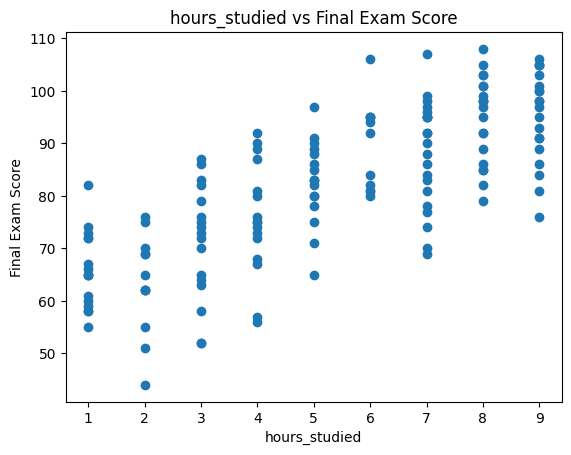

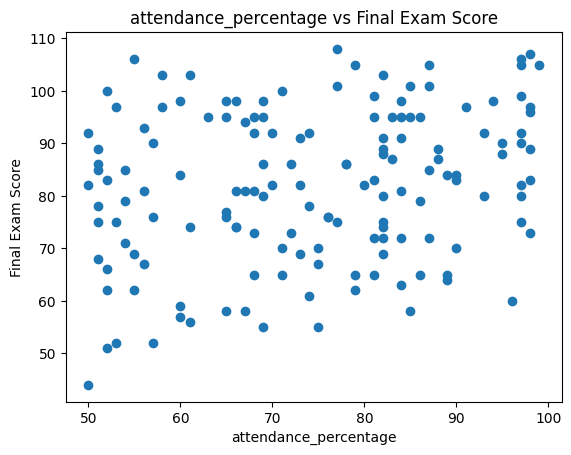

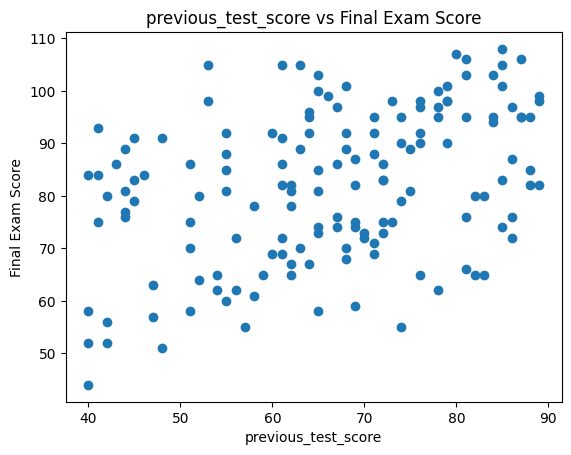

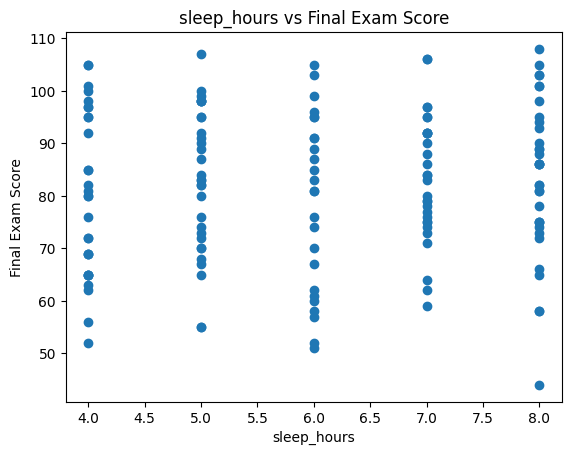

In [6]:
features = ['hours_studied', 'attendance_percentage', 'previous_test_score', 'sleep_hours']

for feature in features:
    plt.figure()
    plt.scatter(df[feature], df['final_exam_score'])
    plt.xlabel(feature)
    plt.ylabel('Final Exam Score')
    plt.title(f'{feature} vs Final Exam Score')
    plt.show()

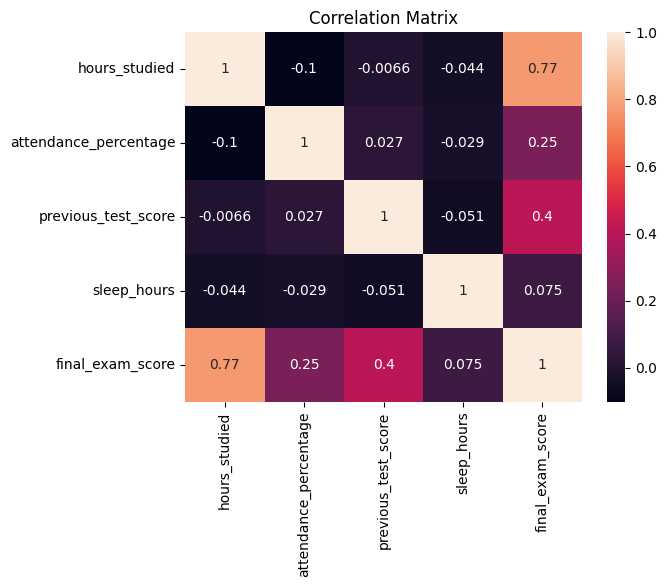

In [7]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

### Data Cleaning
Fixing missing values by replacing them with the median, although none is present in this dataset

In [8]:
df.fillna(df.median(), inplace=True)

### Feature selection, Data preprocessing & Model training

In [9]:
X = df[['hours_studied']]
y = df['final_exam_score']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
coefficients = pd.DataFrame({
    'Features': X.columns,
    'Coefficients': model.coef_
})

coefficients

,Features,Coefficients
0,hours_studied,4.246217


#### Making Predictions

In [13]:
y_pred = model.predict(X_test)
y_pred

array([93.7865658 , 68.30926181, 72.55547914, 64.06304448, 93.7865658 ,
       89.54034846, 68.30926181, 72.55547914, 98.03278313, 64.06304448,
       64.06304448, 72.55547914, 76.80169647, 76.80169647, 81.0479138 ,
       68.30926181, 81.0479138 , 64.06304448, 85.29413113, 76.80169647,
       81.0479138 , 89.54034846, 76.80169647, 64.06304448, 98.03278313,
       98.03278313, 72.55547914, 85.29413113, 72.55547914, 72.55547914])

In [14]:
# Comparing the predicted y values above with the actual y values below
print(y_test)

73      82.0
18      75.0
118     52.0
78      65.0
76      79.0
31      69.0
64      62.0
141     74.0
68      95.0
82      65.0
110     58.0
12      73.0
36      75.0
9       68.0
19      80.0
56      65.0
104     90.0
69      67.0
55      94.0
132     76.0
29      71.0
127     88.0
26      74.0
128     65.0
131     98.0
145     97.0
108     58.0
143    106.0
45      70.0
30      87.0
Name: final_exam_score, dtype: float64


#### Model Evaluation

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

MAE: 6.62
MSE: 85.45
R-squared score: 0.51


#### Analysis of Residuals

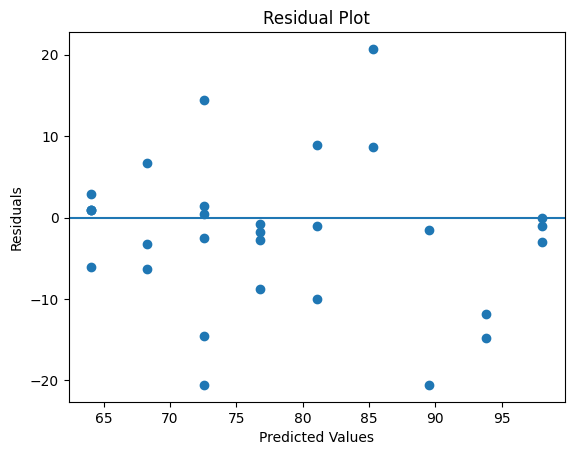

In [16]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### Predicting for John, a new student

In [37]:
new_student = pd.DataFrame({
    'hours_studied': [6]
})

predicted_score = model.predict(new_student)
print(f"John's Predicted Final Exam Score: {predicted_score[0]:.2f}")

John's Predicted Final Exam Score: 85.29
